![](https://www.uautonoma.cl/content/themes/universidad-autonoma-theme/dist/images/global/logo.svg)

# Trabajo Equipo 13 - Técnicas de Big Data para Machine Learning
Integrantes:
- Alexis R.
- Carmen C.
- Constanza P.
- Felipe S.
- Felipe T.

Docente:
- Patricia Moller Acuña

### Inicialización
Importar librerias y Crear Sesión de Spark

In [0]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt

# Crear sesión de Spark
spark = SparkSession.builder.appName("SpotifySongsAnalysis").getOrCreate()

### Carga Dataset
Con Python, en una celda carguen el set de datos y luego desplieguen el contenido
de este.

In [0]:

# Ruta del Archivo (Ajustar según el path real en Databricks) descarga disponible en https://www.kaggle.com/datasets/anandshaw2001/top-spotify-songs-in-73-countries/data
file_path = "/FileStore/tables/Top_spotify_songs.csv"

# Cargar el Dataset en un Dataframe de Spark
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Mostrar las primeras filas del dataset
df.show()

+--------------------+--------------------+--------------------+----------+--------------+---------------+-------+-------------+----------+-----------+-----------+--------------------+------------------+------------+-------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|          spotify_id|                name|             artists|daily_rank|daily_movement|weekly_movement|country|snapshot_date|popularity|is_explicit|duration_ms|          album_name|album_release_date|danceability| energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+--------------------+--------------------+----------+--------------+---------------+-------+-------------+----------+-----------+-----------+--------------------+------------------+------------+-------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|2plbrEY59IikOBgBG...|   

### Tabla Temporal
Con Python, en una celda creen una tabla temporal.

In [0]:
# Crear tabla temporal
df.createOrReplaceTempView("spotify_songs")

# Consultar la tabla temporal con SQL
spark.sql("SELECT * FROM spotify_songs LIMIT 5").show()
spark.sql("DESCRIBE spotify_songs").show()
df.dtypes

+--------------------+------------------+--------------------+----------+--------------+---------------+-------+-------------+----------+-----------+-----------+--------------------+------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|          spotify_id|              name|             artists|daily_rank|daily_movement|weekly_movement|country|snapshot_date|popularity|is_explicit|duration_ms|          album_name|album_release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|
+--------------------+------------------+--------------------+----------+--------------+---------------+-------+-------------+----------+-----------+-----------+--------------------+------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+
|2plbrEY59IikOBgBG...|  Die With A

### Gráfico de Barras
Con base en el set de datos, generen una consulta que les permita obtener un gráfico de barras. En la celda deben entregar una breve explicación de lo que buscan visualizar con el gráfico, la consulta debe diferir de las que se le solicitan en
los puntos d y e.

In [0]:
# Crear un gráfico de barras de los 10 cantantes más escuchados
artists_query = spark.sql("""
    SELECT artists, COUNT(*) AS song_count
    FROM spotify_songs
    GROUP BY artists
    ORDER BY song_count DESC
    LIMIT 10
""")


display(artists_query)

# Cálculo de porcentaje respecto al total
perc_art_query = spark.sql("""
    SELECT artists, COUNT(*) AS song_count,
        ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS percentage
    FROM spotify_songs
    GROUP BY artists
    ORDER BY song_count DESC
    LIMIT 10
""")
display(perc_art_query)

artists,song_count
Billie Eilish,26435
Sabrina Carpenter,25879
Taylor Swift,18629
Bad Bunny,18552
KAROL G,18013
Jimin,14871
Benson Boone,14046
Teddy Swims,12809
Feid,12402
"Lady Gaga, Bruno Mars",10923


Databricks visualization. Run in Databricks to view.

artists,song_count,percentage
Billie Eilish,26435,1.53
Sabrina Carpenter,25879,1.50
Taylor Swift,18629,1.08
Bad Bunny,18552,1.07
KAROL G,18013,1.04
Jimin,14871,0.86
Benson Boone,14046,0.81
Teddy Swims,12809,0.74
Feid,12402,0.72
"Lady Gaga, Bruno Mars",10923,0.63


#### Interpretación gráfico de Barras

La gráfica muestra los 10 artistas más escuchados en 73 países, según el número total de reproducciones acumuladas. En primer lugar se encuentra Billie Eilish con un 1.53%, seguida de Sabrina Carpenter con un 1.50%, y luego Taylor Swift con un 1.08%, muy cerca de Bad Bunny, quien tiene un 1.07%, solo 0.01% menos. Karol G completa el top 5 con un 1.04%. Este grupo refleja una predominancia de mujeres en los primeros lugares, con géneros pop y urbano liderando.

Sin embargo, al considerar el top 10 completo, la balanza entre hombres y mujeres se equipara en cuanto a cantidad. Artistas como Jimin (0.86%), Benson Boone (0.81%), Teddy Swims (0.74%), Feid (0.72%), y el dúo Lady Gaga & Bruno Mars (0.63%) destacan en los lugares restantes, sumando una fuerte presencia masculina en la lista.

A pesar de lo anterior, y de forma acumulativa, considerando de forma equitativa un 0.315% tanto para Lady Gaga como para Bruno Mars, se puede concluir que para el top 10 de artistas más escuchados, las artistas femeninas acumulan un 5.455%, por sobre el 4.515% de los hombres. Esto refuerza la significativa presencia de mujeres en la música más popular global.

### Histograma
Con base en el set de datos, generen una consulta que les permita obtener un **histograma**. En la celda deben entregar una breve explicación de lo que busca visualizar con el histograma, la consulta debe diferir de las que se le solicitan en los puntos c y e.


In [0]:
# Crear histograma utilizando tempo
tempo_query = spark.sql("""
SELECT tempo
FROM spotify_songs

""")

# Visualizar los resultados
display(tempo_query)

tempo
157.969
138.008
101.061
149.027
104.978
96.782
136.02
100.036
119.387
108.548


Databricks visualization. Run in Databricks to view.

####Interpretación Histograma

Para comenzar, es importante mencionar que los datos del tempo (velocidad de la canción) son los beat por minutos. De acuerdo en lo anterior, se puede apreciar que en su mayoría se concentra entre 100 y 130 BPM. Por ejemplo, "Stayin' Alive" de los Bee Gees tiene un tempo de 104 BPM, mientras que "Waiting for Love" de Avicii alcanza los 128 BPM. Este tipo de canciones son dinámicas, suelen acompañar las actividades diarias, como trabajo o donde se requiera mantener una energía constante.

En cuanto a canciones menor a ese rango, encontramos a "Someone Like You" de Adele con 67.5 BPM, canción que pertenece a un grupo de más pausado, que podrían asociarse a momentos más reflexivos. Por otra parte, para canciones por sobre el rango anterior, encontramos a "Don't Stop Me Now" de Queen con 156 BPM, que representarían canciones mucho más explosivas, como para momentos más intenso o eufóricos, como fiestas o entrenamientos.

Esto sugiere que el tempo musical juega un rol importante como reflejo del ritmo de vida y las emociones de las personas, adaptándose a diferentes momentos y necesidades del día.



### Gráfico en Quantile Plot
Con base en el set de datos, generen una consulta que les permita obtener un gráfico **Quantile Plot**. En la celda deben entregar una breve explicación de lo que buscan visualizar con el gráfico, la consulta debe diferir de las que se le solicitan en los puntos c y d.


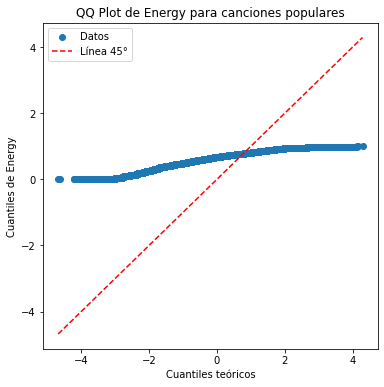

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer los datos con PySpark y tomar una muestra representativa
df_sampled = spark.sql("""
    SELECT CAST(energy AS DOUBLE) AS energy
    FROM spotify_songs
    WHERE popularity >= 70
""").sample(fraction=0.2, seed=42)  # Tomar una muestra del 20% de los datos

# Convertir a RDD, filtrar los nulos, y obtener el array de NumPy
rdd = df_sampled.rdd.filter(lambda row: row[0] is not None).map(lambda row: float(row[0]))  # Convertir a float

# Convertir el RDD a un array de NumPy
data = np.array(rdd.collect())

# Normalizar
mean = np.mean(data)
std = np.std(data)
normalized_data = (data - mean) / std  # Transformación Z-score

# Ordenar los datos
sorted_data = np.sort(data)

# Calcular los cuantiles teóricos de una distribución normal estándar
quantiles = np.linspace(0, 1, len(sorted_data))
theoretical_quantiles = np.quantile(np.random.normal(0, 1, len(sorted_data)), quantiles)

# Graficar el QQ Plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sorted_data, label="Datos")
plt.plot(theoretical_quantiles, theoretical_quantiles, color="red", linestyle="--", label="Línea 45°")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Energy")
plt.title("QQ Plot de Energy para canciones populares")
plt.legend()
plt.show()

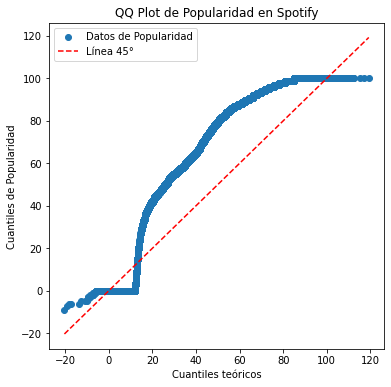

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer los datos con PySpark y tomar una muestra más grande
df_sampled = spark.sql("""
    SELECT CAST(popularity AS DOUBLE) AS popularity
    FROM spotify_songs
""").sample(fraction=0.2, seed=42)  # Tomar una muestra del 20%

# Convertir a RDD, filtrar los nulos y obtener el array de NumPy
rdd = df_sampled.rdd.filter(lambda row: row[0] is not None).map(lambda row: float(row[0]))

# Convertir el RDD a un array de NumPy
data = np.array(rdd.collect())

# Ordenar los datos
sorted_data = np.sort(data)

# Calcular los cuantiles teóricos de una distribución normal estándar
quantiles = np.linspace(0, 1, len(sorted_data))
theoretical_quantiles = np.quantile(np.random.normal(50, 15, len(sorted_data)), quantiles)  # Media 50, Desviación 15

# Graficar el QQ Plot
plt.figure(figsize=(6, 6))
plt.scatter(theoretical_quantiles, sorted_data, label="Datos de Popularidad")
plt.plot(theoretical_quantiles, theoretical_quantiles, color="red", linestyle="--", label="Línea 45°")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Popularidad")
plt.title("QQ Plot de Popularidad en Spotify")
plt.legend()
plt.show()

#### Interpretación Gráfico

En primera instancia se utilizó la columna "energy" para graficar, pero, dado que que sus datos se encuentran en 0 y 1, el resultado no es muy intuitivo si se muestra en un Quantile Plot. Por ello, se eligió la columna "popularity" que tiene valores entre 0 y 100. Como resultado, se pueden ver que los datos siguen una distribución normal (línea roja) en el gráfico. Esto nos permite ver qué tan populares son las canciones y detectar, a simple vista, si es que hay un grupo de canciones (cúmulo de puntos) que se diferencia significativamente con el resto de canciones.

###**Formulen las conclusiones a partir de lo desarrollado.**

En conclusión la visualización de estos datos nos permite tener un panorama general en un momento determinado y poder identificar preferencias musicales futuras. En este caso, saber el ritmo de las canciones y los artistas más escuchados en diferentes países sirve para inferir el público objetivo, siendo el género Pop el preferente por adolescentes que se identifican con las letras de las canciones de Billie Eilish y Taylor Swift. Al buscar la causa de este fenómeno salen a la luz diferentes estudios que explican que las plataformas de streaming como Spotify, son utilizadas mayoritariamente por jóvenes. Por ejemplo en Madrid se realizó un estudio a personas entre 12 y 20 años que deja en evidencia, que este rango etario se inclina por sonidos más populares y definidos, en cambio un público más mayor opta por una fusión musical más variada(Cremades et al., 2010). Con todo esto en mente, los sellos discográficos saben específicamente a que público dirigir las canciones, los artistas pueden volcarse a estilos musicales en tendencia y finalmente,las plataformas de streaming pueden ajustar sus algoritmos para hacer más populares canciones con baja visibilidad.


<br><br>


**Referencias**

Cremades-Andreu, R., Lage-Gómez, C., Campollo-Urkiza, A., & Hargreaves, D. J. (2024). La música que escuchan las nuevas generaciones: preferencias y estereotipos [The music that new generations listen to: preferences and stereotypes]. Revista Española de Pedagogía, 82(287), 23-36. https://doi.org/10.22550/2174-0909.3925

